Commentary:
1. There are more rides in urban areas, along with more drivers to meet the demand for mostly lesser cost.
2. Although there are more drivers than rides in an urban environment, there are more rides than drivers in both the subsurban and rural environments.
3. Rural average fare has a much more scattered distribution between high cost and low cost rides, and although it does trend towards more expensive there are some interesting instances of cheaper average fare that rivals urban area but not subsurban areas. 


In [7]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = pd.read_csv("Data/city_data.csv")
ride_data = pd.read_csv("Data/ride_data.csv")

# Read the City and Ride Data
city_data = city_data.drop_duplicates('city')

# Combine the data into a single dataset
Pyber = pd.merge(city_data,ride_data, on ='city')

# Display the data table for preview
Pyber.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

C:\Users\emily\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\emily\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\emily\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

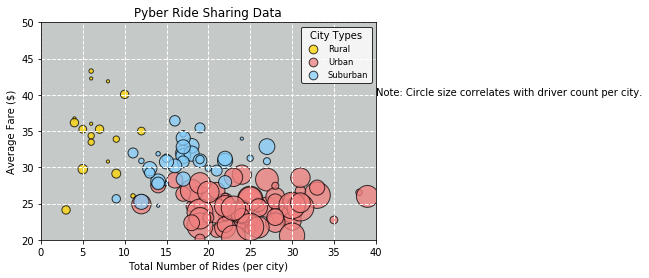

In [13]:
# Obtain the x and y coordinates for each of the three city types
by_city = Pyber.groupby('city')
avg_fare = round(by_city['fare'].mean(),2).map("${:.2f}".format)
ride_count = by_city['ride_id'].count()
driver_count = by_city['driver_count'].mean()
city_type = city_data.set_index('city')['type']

city_info = pd.DataFrame({
    "Number of Rides": ride_count,
    "Average Fare": avg_fare,
    "Number of Drivers": driver_count,
    "Type of City": city_type
                         })
city_info.sort_values('Number of Drivers', ascending = False)
city_info.head()

rural = city_info[city_info['Type of City'] == 'Rural']
urban = city_info[city_info['Type of City'] == 'Urban']
suburban = city_info[city_info['Type of City'] == 'Suburban']

rural['Average Fare'] = rural['Average Fare'].replace('\$','', regex=True).astype('float')
urban['Average Fare'] = urban['Average Fare'].replace('\$','', regex=True).astype('float')
suburban['Average Fare'] = suburban['Average Fare'].replace('\$','', regex=True).astype('float')

plt.title('Pyber Ride Sharing Data')
plt.grid(color='w', linestyle='-', linewidth=1)
plt.scatter(rural['Number of Rides'], 
            rural['Average Fare'], 
            s = rural['Number of Drivers']*10, 
            color = 'gold', 
            edgecolor = 'black', 
            label = 'Rural', 
            alpha = .75,
            linewidths = 1)

plt.scatter(urban['Number of Rides'], 
            urban['Average Fare'], 
            s=urban['Number of Drivers']*10, 
            color = 'lightcoral',
            edgecolor= 'black',
            label = 'Urban',
            alpha = .75,
            linewidths = 1)

plt.scatter(suburban['Number of Rides'], 
            suburban['Average Fare'], 
            s=suburban['Number of Drivers']*10, 
            color = 'lightskyBlue',
            edgecolor= 'black',
            label = 'Suburban',
            alpha = .75,
            linewidths = 1)

plt.legend (loc = "upper right")
plt.text(40,40,"Note: Circle size correlates with driver count per city.")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")
plt.ylim(20,50)
plt.xlim(0,40)

plt.grid(color='w', linestyle='dashed', linewidth=1)

lgnd = plt.legend(frameon = True, edgecolor = 'black', title = 'City Types', fontsize = 'small')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
ax = plt.gca()
ax.set_facecolor('xkcd:silver')


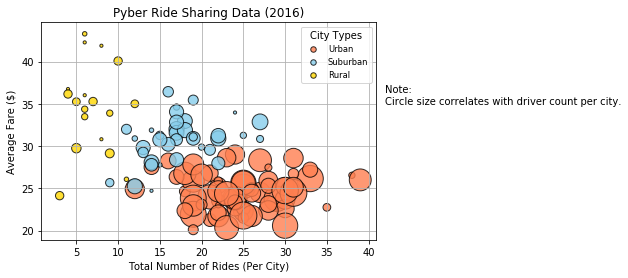

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

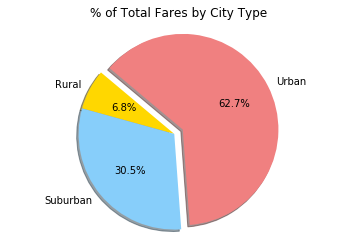

In [9]:
city_type = Pyber.groupby('type')
Total_fare= city_type['fare'].sum()

Total_fare_df = pd.DataFrame(Total_fare)
Overall_fare = Total_fare_df['fare'].sum()
Total_fare_df['Percentage of Fare'] = round((Total_fare_df['fare']/Overall_fare)*100,1).map("{:.1f}%".format)

plt.title("% of Total Fares by City Type")
explode = [0,0,0.1]
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'lightskyBlue', 'lightCoral']
plt.pie(Total_fare, 
       explode = explode,
        labels = labels,
        colors = colors,
        shadow = True,
        autopct = '%1.1f%%',
        startangle = 140
       )
plt.axis("equal")
plt.show()

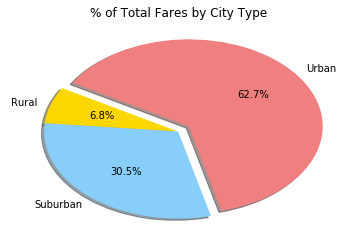

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

(-1.1110420108142822,
 1.215408844786391,
 -1.085782351148256,
 1.1462471637001541)

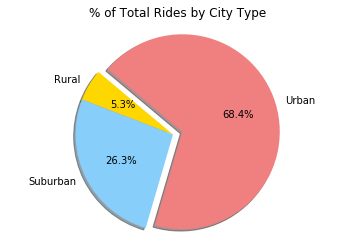

In [10]:
city_type = Pyber.groupby('type')
ride_count = city_type['ride_id'].count()

Total_ride = pd.DataFrame(ride_count)
Overall_rides = Total_ride['ride_id'].sum()

Total_ride['Percentage of Rides'] = round((Total_ride['ride_id']/Overall_rides)*100,1).map("{:.1f}%".format)

plt.title("% of Total Rides by City Type")
explode = [0,0,0.1]
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'lightskyBlue', 'lightCoral']
plt.pie(ride_count, 
       explode = explode,
        labels = labels,
        colors = colors,
        shadow = True,
        autopct = '%1.1f%%',
        startangle = 140)
plt.axis("equal")

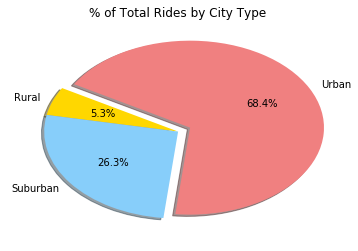

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

(-1.114016675906232,
 1.2065029408549544,
 -1.134035012314224,
 1.0785783188700298)

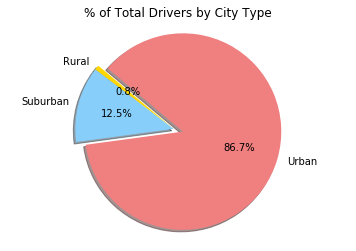

In [11]:
city_type = Pyber.groupby('type')
driver_count = city_type.sum()['driver_count']
Total_driver = pd.DataFrame(driver_count)
overall_driver_count = Total_driver['driver_count'].sum()
Total_driver['Percentage of Drivers'] = round(Total_driver['driver_count']/overall_driver_count*100,1).map("{:.1f}%".format)
Total_driver

plt.title("% of Total Drivers by City Type")
explode = [0,0,0.1]
labels = ['Rural', 'Suburban', 'Urban']
colors = ['Gold', 'lightskyBlue', 'lightCoral']
plt.pie(driver_count, 
       explode = explode,
        labels = labels,
        colors = colors,
        shadow =True,
        autopct = '%1.1f%%',
        startangle = 140
       )
plt.axis("equal")

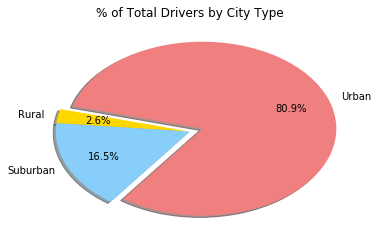

In [6]:
# Show Figure
plt.show()